Exploratory sata analysis and model bulding on pharmacy sales data

Developing a forecasting model to predict future demand for healthcare product sales in Tanzania for the
next 6 months starting from June 2024. The goal is to help local pharmacies make informed decisions and
improve health outcomes by anticipating healthcare needs.

tasks

1; Data Exploration and Cleaning

2; Model building

3; Model evaluation


liblary importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.model_selection import train_test_split

/home/sinbad/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_excel(r'/home/sinbad/Desktop/DATASET.xlsx')

In [3]:
data.head()

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,October,2023,577098.0
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,February,2024,1005058.0
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,February,2023,436704.0
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),March,2023,NaN
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,August,2023,NaN


In [4]:
data['Month'] = pd.to_datetime(data['Month'], format='%B').dt.month
data.head()

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,10,2023,577098.0
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,2,2024,1005058.0
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,2,2023,436704.0
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),3,2023,NaN
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,8,2023,NaN


In [5]:
sales_trend = data.groupby(['Year','Month'])['Sales'].sum().reset_index()
sales_trend

,Year,Month,Sales
0,2023,1,8.561905e+06
1,2023,2,8.898086e+06
2,2023,3,7.675084e+06
3,2023,4,1.579313e+07
4,2023,5,9.011804e+06
5,2023,6,1.238357e+07
6,2023,7,8.305478e+06
7,2023,8,9.128949e+06
8,2023,9,7.579946e+06
9,2023,10,8.389505e+06


<Axes: xlabel='Month', ylabel='Sales'>

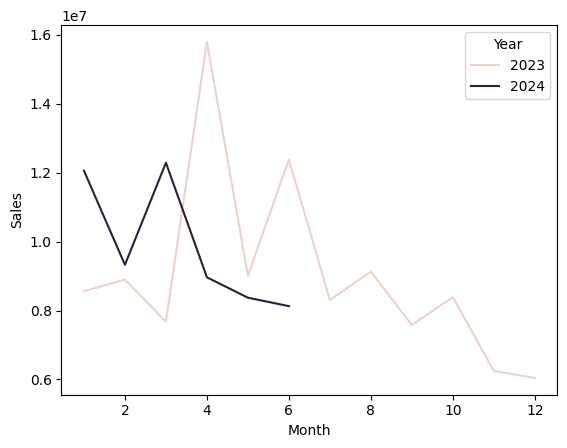

In [6]:
# trend of the sales monthly 
sns.lineplot(x='Month', y='Sales', hue='Year',data=sales_trend )

<Axes: xlabel='Month', ylabel='MONTHLY GROWTH'>

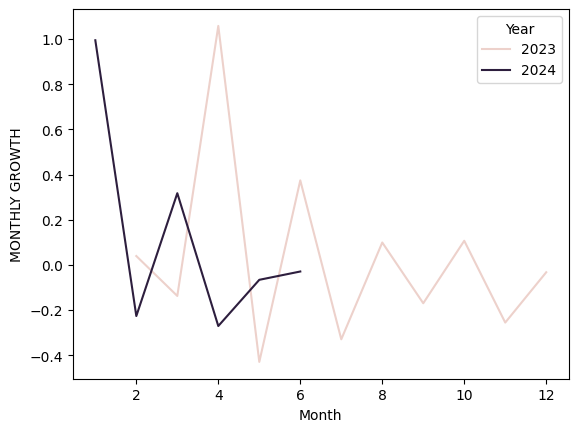

In [7]:
monthly_sales = data.groupby(['Year','Month'])['Sales'].sum().reset_index()
monthly_sales['MONTHLY GROWTH'] = monthly_sales['Sales'].pct_change()
sns.lineplot(x="Month", y="MONTHLY GROWTH",hue="Year", data=monthly_sales)

In [8]:
monthly_sales

,Year,Month,Sales,MONTHLY GROWTH
0,2023,1,8.561905e+06,NaN
1,2023,2,8.898086e+06,0.039265
2,2023,3,7.675084e+06,-0.137445
3,2023,4,1.579313e+07,1.057714
4,2023,5,9.011804e+06,-0.429385
5,2023,6,1.238357e+07,0.374150
6,2023,7,8.305478e+06,-0.329315
7,2023,8,9.128949e+06,0.099148
8,2023,9,7.579946e+06,-0.169680
9,2023,10,8.389505e+06,0.106803


In [9]:
data['Timeline'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str),format='%Y-%m')
data = data.drop(['Month','Year'],axis=1)
data = data.sort_values(by='Date').reset_index(drop=True)
data['Date'] = data['Date'].dt.strftime('%Y-%m')
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes


KeyError: 'Date'

In [ ]:
# data = data.set_index('Date', inplace=True)

In [ ]:
data.head()

,Pharmacy Name,Product Code,Product Name,Sales,Date
0,Kigamboni Pharmacy,10010108AC,CONDOMS,NaN,2023-01-01
1,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,824361.000000,2023-01-01
2,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,93.924291,2023-01-01
3,UBUNGO PHARMACY,10010108AC,CONDOMS,42.000000,2023-01-01
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,NaN,2023-01-01


In [ ]:
data.isna().sum().sort_values(ascending=False)

Sales            99
Pharmacy Name     0
Product Code      0
Product Name      0
Date              0
dtype: int64

In [ ]:
data = data.dropna(subset=['Sales'])

In [ ]:
data.head(20)

,Pharmacy Name,Product Code,Product Name,Sales,Date
1,UBUNGO PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,824361.000000,2023-01-01
2,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,93.924291,2023-01-01
3,UBUNGO PHARMACY,10010108AC,CONDOMS,42.000000,2023-01-01
6,UBUNGO PHARMACY,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),602024.000000,2023-01-01
8,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,458773.000000,2023-01-01
9,ilala pharmacy,40030134AC,Copper T IUD,30.600000,2023-01-01
10,TEMEKE PHARMACY,40030134AC,Copper T IUD,403365.000000,2023-01-01
12,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,683376.000000,2023-01-01
13,Kigamboni Pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,700114.000000,2023-01-01
14,Kigamboni Pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),505413.000000,2023-01-01


In [ ]:
data.shape

(351, 5)

In [ ]:
data['Sales'].describe()

count    3.510000e+02
mean     4.762346e+05
std      3.488904e+05
min      6.040829e+00
25%      5.900000e+04
50%      5.168630e+05
75%      7.363460e+05
max      1.400000e+06
Name: Sales, dtype: float64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.size

1755

<Axes: xlabel='Sales', ylabel='Product Code'>

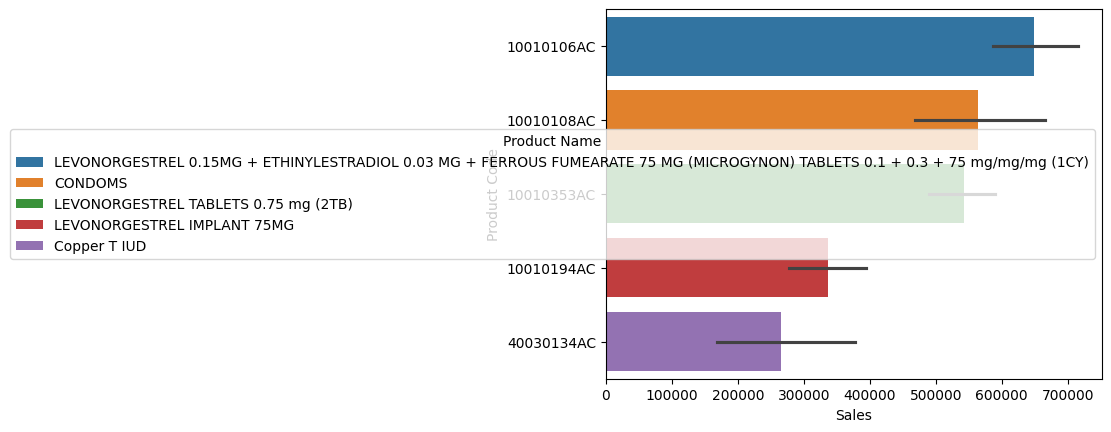

In [ ]:
# most selling product
sns.barplot(y="Product Code", x="Sales", hue="Product Name", data=data, )

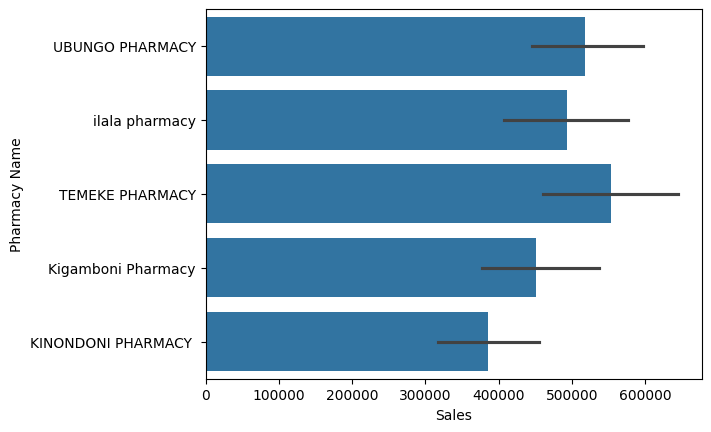

In [ ]:
# most selling pharmacy
sns.barplot(y="Pharmacy Name", x="Sales", data = data)
plt.show()

<Axes: xlabel='Sales', ylabel='Date'>

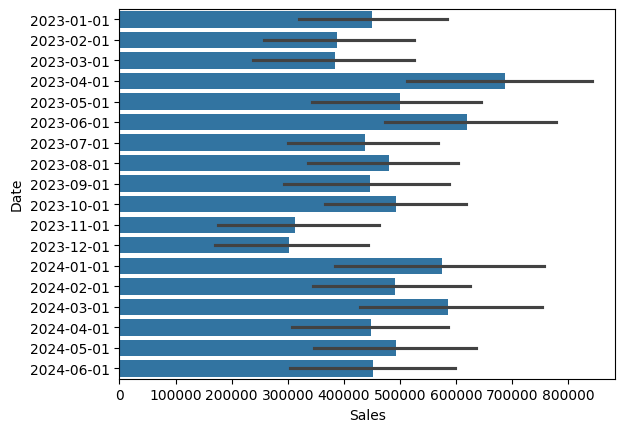

In [ ]:
sns.barplot(y='Date',x='Sales', data=data)

In [ ]:
data.columns

Index(['Pharmacy Name', 'Product Code', 'Product Name', 'Sales', 'Date'], dtype='object')

training

In [ ]:
# Define the size of the training set
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
# Fit the ARIMA model on the training data
arima_order = (5, 1, 0)
model = ARIMA(train['Sales'], order=arima_order)
model_fit = model.fit()

/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Forecast the sales for the test period
forecast = model_fit.forecast(steps=len(test))

# forecast = pd.Series(forecast, index=test.index)

# Add the forecasted values to the test set
test['Forecasted_Sales'] = np.array(forecast)


/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sinbad/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_3865/1862616699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecasted_Sales'] = np.array(forecast)


In [ ]:
test

,Pharmacy Name,Product Code,Product Name,Sales,Date,Forecasted_Sales
356,TEMEKE PHARMACY,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),7.265850e+05,2024-03-01,431696.448933
357,Kigamboni Pharmacy,40030134AC,Copper T IUD,1.300000e+06,2024-03-01,403538.665549
358,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,5.168630e+05,2024-03-01,402873.060093
359,ilala pharmacy,10010194AC,LEVONORGESTREL IMPLANT 75MG,4.323530e+05,2024-03-01,442908.363066
360,KINONDONI PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,4.617430e+05,2024-03-01,374602.767325
...,...,...,...,...,...,...
440,UBUNGO PHARMACY,40030134AC,Copper T IUD,3.721270e+01,2024-06-01,389858.401497
441,TEMEKE PHARMACY,10010108AC,CONDOMS,3.594477e+02,2024-06-01,389858.401528
442,UBUNGO PHARMACY,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),4.520560e+05,2024-06-01,389858.401556
445,ilala pharmacy,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,7.746060e+05,2024-06-01,389858.401556


Mean Squared Error: 122500279625.86118


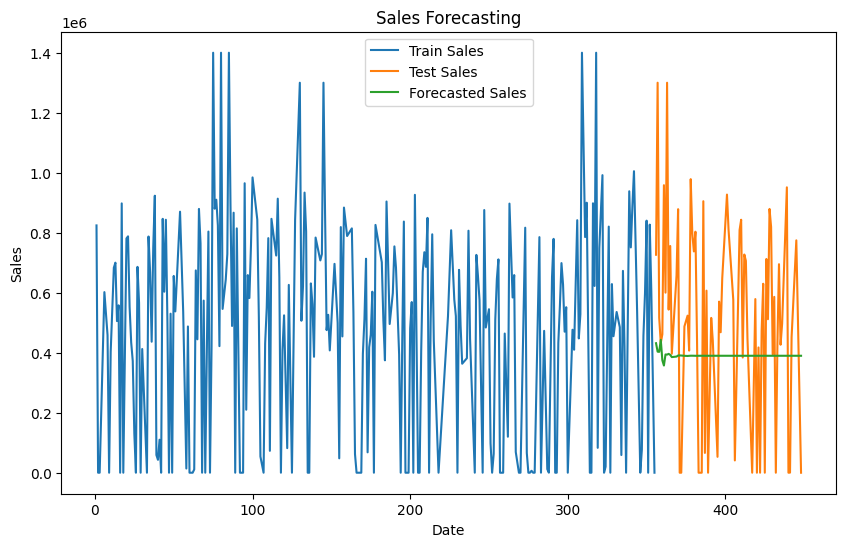

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(test['Sales'], test['Forecasted_Sales'])
print(f'Mean Squared Error: {mse}')

# Plot the actual vs forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Sales'], label='Train Sales')
plt.plot(test.index, test['Sales'], label='Test Sales')
plt.plot(test.index, test['Forecasted_Sales'], label='Forecasted Sales')
plt.legend()
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
mape = np.mean(np.abs((test['Sales'] - test['Forecasted_Sales']) / test['Sales'])) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Percentage Error: 230649.21545628994%
